# Project 2 - Part 4: Choose your own advecnture! (7 Points; Optional for Extra Credit)



This section is open ended and your chance to explare any advanced analysis. Please perform any additional analysis you find interesting! Suggested analyses (only do one max):

- Topic evolution over time - see https://maartengr.github.io/BERTopic/getting_started/topicsovertime/topicsovertime.html#visualization 
- Word frequency over time - does the frequency of certain words change over time
- Semantic similarity - investigate similarity within and between presidents or time periods. For example, similarity between one presidents speeches, e.g. are all of Biden's speeches similar to each other? How similar are they to Trump's speeches? Are speeches from the 2000s more similar to each other than speeches in the 1800s? Which two presidents have the most similar speeches? See https://spacy.io/usage/linguistic-features#vectors-similarity 
-  Named Entity Recognition - which entity types are most common in speeches? What are the most common words for each entity type - see https://spacy.io/usage/linguistic-features#named-entities 
- Classification - can you build a classifier to detect democratic versus republican state of the union speeches from 1980-2024 - see https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py 


In [14]:
####################
## CALL THIS BLOCK FROM part00_utils_visuals.py
####################

from bertopic import BERTopic

# read in SOTU.csv using pandas, name the variable `sou` for simplicity
# the below cell is what the output should look like

from src import part00_utils_visuals as part00
# import src.part00_utils_visuals as part00

from src import part01

part00.plot_style(style=part00.PLOT_STYLE_SEABORN)


sou        = part00.pd.read_csv(part00.DIR_DATA_00_RAW / part00.CSV_SOTU)
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


In [21]:
timestamps = sou.Year.to_list()
timestamps;

In [20]:
docs       = sou.Text.to_list()
docs;

## Topic evolution over time 
**Reference:**
- https://maartengr.github.io/BERTopic/getting_started/topicsovertime/topicsovertime.html#visualization

In [23]:
# train the model - this takes about 30 seconds
MIN_TOPIC_SIZE = 3
IS_VERBOSE = True

step07_topic_model    = BERTopic(min_topic_size=MIN_TOPIC_SIZE, verbose=IS_VERBOSE)
topics, probabilities = step07_topic_model.fit_transform(docs)
topics, probabilities;

2025-11-26 02:50:02,342 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

2025-11-26 02:50:13,379 - BERTopic - Embedding - Completed ✓
2025-11-26 02:50:13,380 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-26 02:50:13,703 - BERTopic - Dimensionality - Completed ✓
2025-11-26 02:50:13,704 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-26 02:50:13,715 - BERTopic - Cluster - Completed ✓
2025-11-26 02:50:13,718 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-26 02:50:15,096 - BERTopic - Representation - Completed ✓


In [26]:
###
# help(step07_topic_model.topics_over_time)
###

# topics_over_time(
#     docs: List[str],
#     timestamps: Union[List[str], List[int]],
#     topics: List[int] = None,
#     nr_bins: int = None,
#     datetime_format: str = None,
#     evolution_tuning: bool = True,
#     global_tuning: bool = True
# ) -> pandas.core.frame.DataFrame method of bertopic._bertopic.BERTopic instance
#     Create topics over time.


topics_over_time = step07_topic_model.topics_over_time(docs, timestamps, nr_bins=20)

20it [00:02,  6.94it/s]


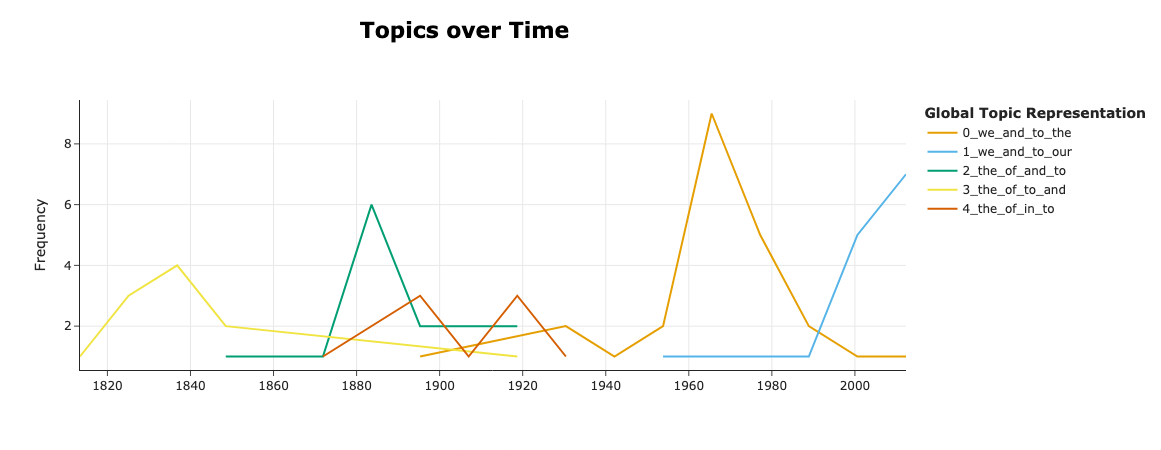

In [28]:
step07_topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=5)